# EXP03: Additive Interaction

What this notebook does: runs using an additive model.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import seaborn as sns
import copy
sns.set_style("ticks")

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor

%matplotlib inline

In [3]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_final.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 41 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3

[('北', 'black'), ('\uf492', 'mediumblue'), ('\uf0c0', 'lightgrey'), ('\uf0c0', 'grey'), ('\uf0c0', 'black'), ('\uf07a', 'tab:orange'), ('\uf07a', 'tab:red'), ('\uf19d', 'black'), ('便', 'black')]


/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/matplotlib/backends/_backend_pdf_ps.py:62: RuntimeWarning: Glyph 40 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/matplotlib/backends/_backend_pdf_ps.py:62: RuntimeWarning: Glyph 39 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/matplotlib/backends/_backend_pdf_ps.py:62: RuntimeWarning: Glyph 44 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/matplotlib/backends/_backend_pdf_ps.py:62: RuntimeWarning: Glyph 41 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_

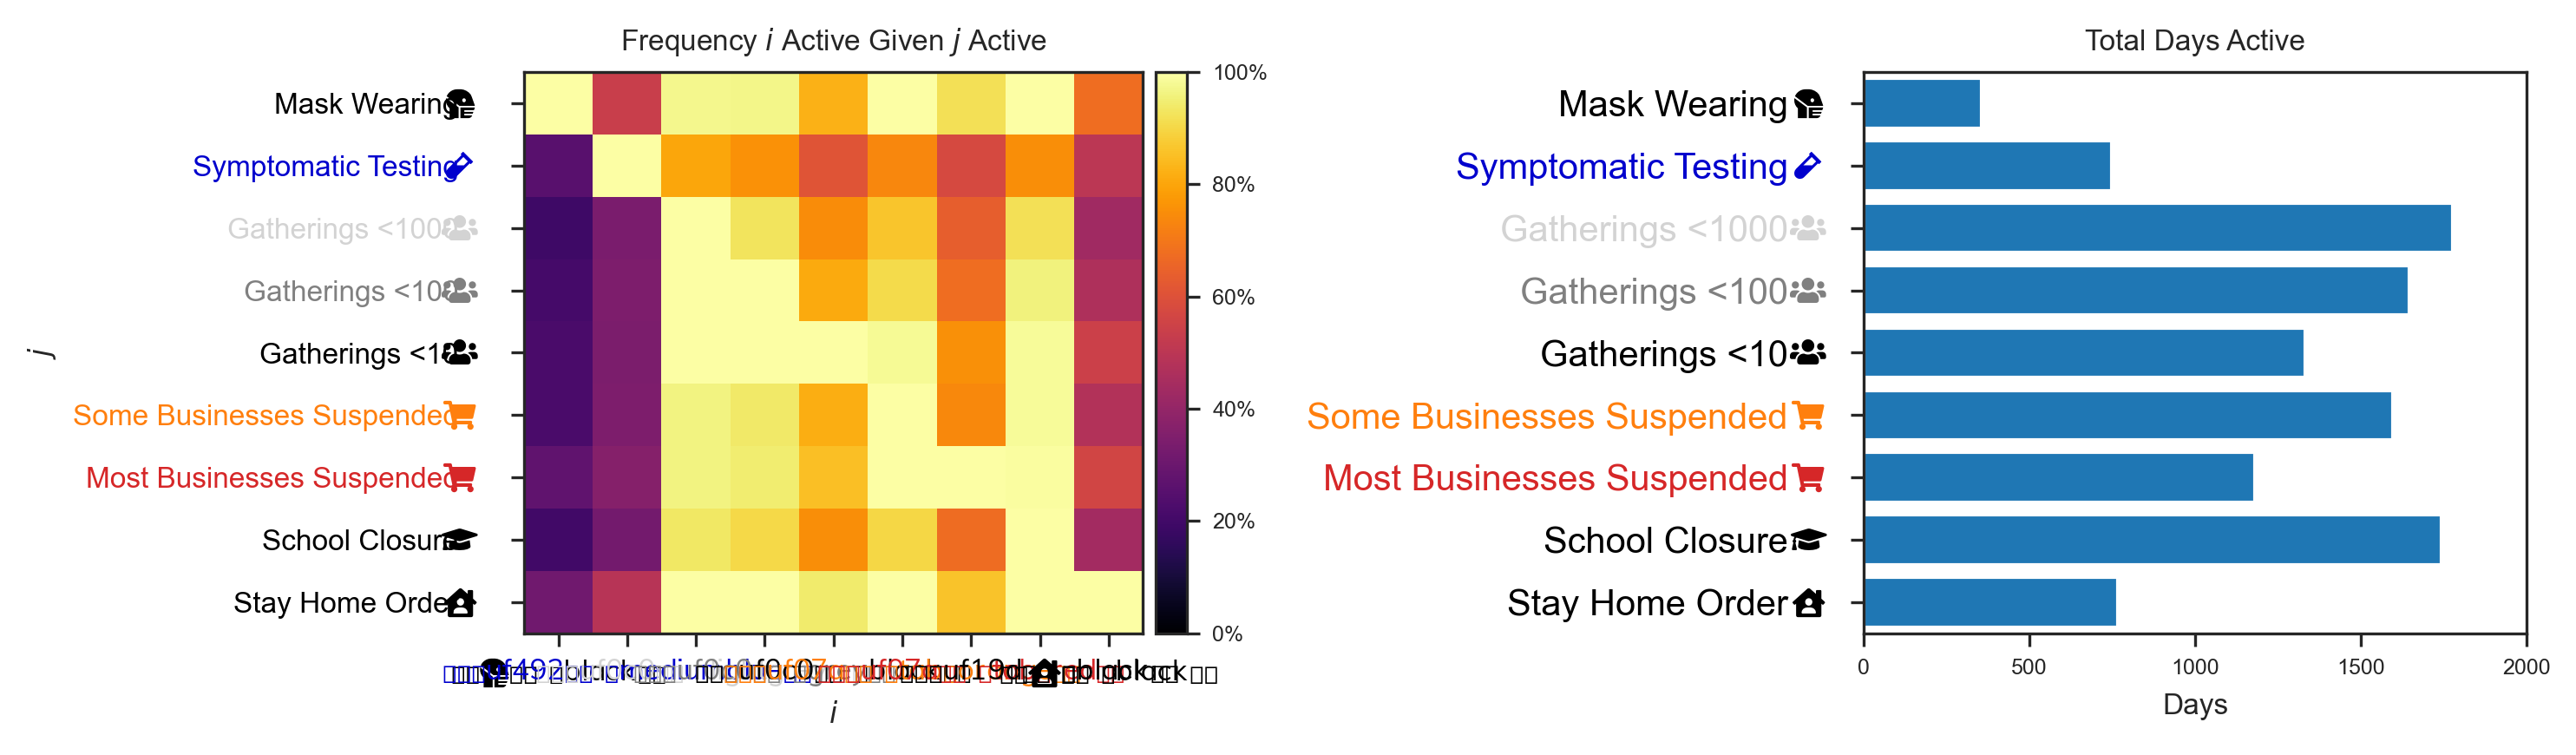

In [4]:
cm_plot_style = [
#             ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf492", "mediumblue"), # vial
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2 
            ("\uf19d", "black"), # school
            ("\uf965", "black") # home
        ]
data.summary_plot(cm_plot_style)

Compared to the usual plot, there are fewer days of schools. 

In [5]:
with cm_effect.models.CMCombined_Additive(data, cm_plot_style) as model:
    model.build_model()

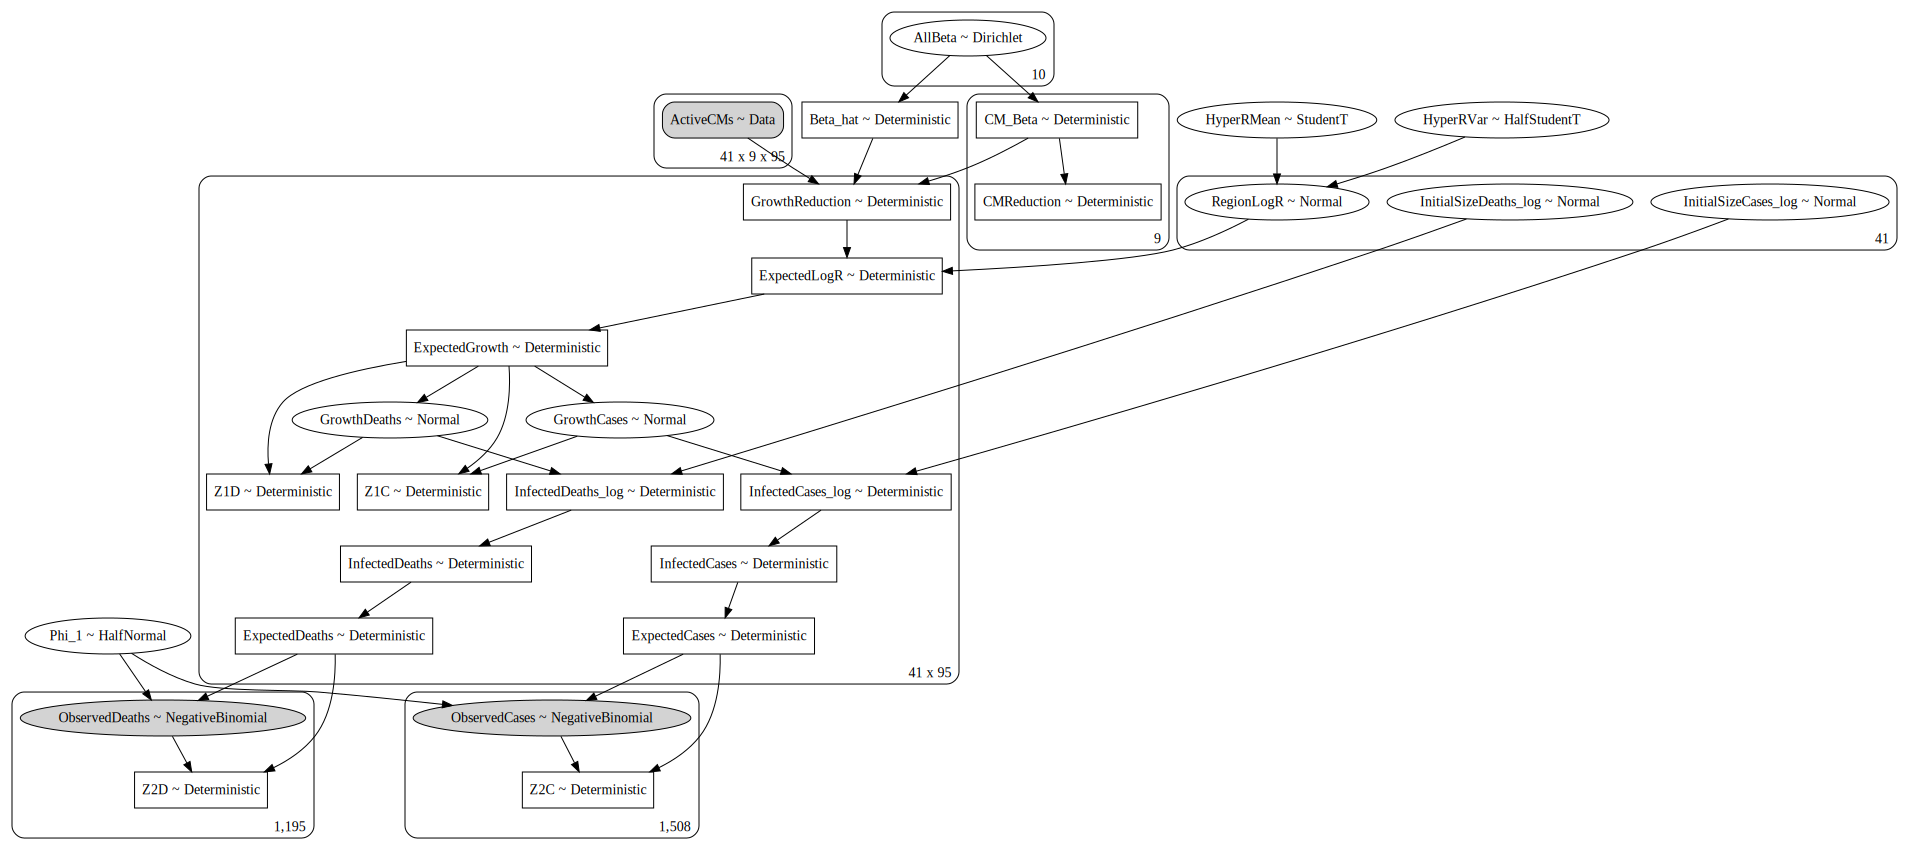

In [6]:
pm.model_to_graphviz(model).render("model-combined-additive")
pm.model_to_graphviz(model)

In [11]:
with model.model:
    model.trace = pm.sample(500, chains=4, cores=4, target_accept=0.975)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, HyperRVar, HyperRMean, AllBeta]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, HyperRVar, HyperRMean, AllBeta]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [59:34<00:00,  1.12draws/s]  
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. I

In [13]:
np.mean(model.trace["AllBeta"], axis=0)

array([0.16913754, 0.01580057, 0.02606138, 0.05409115, 0.04295588,
       0.0364467 , 0.10255863, 0.02044295, 0.50169712, 0.03080807])

INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/neurips/out at 30-05;22-49
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/neurips/out at 30-05;22-50


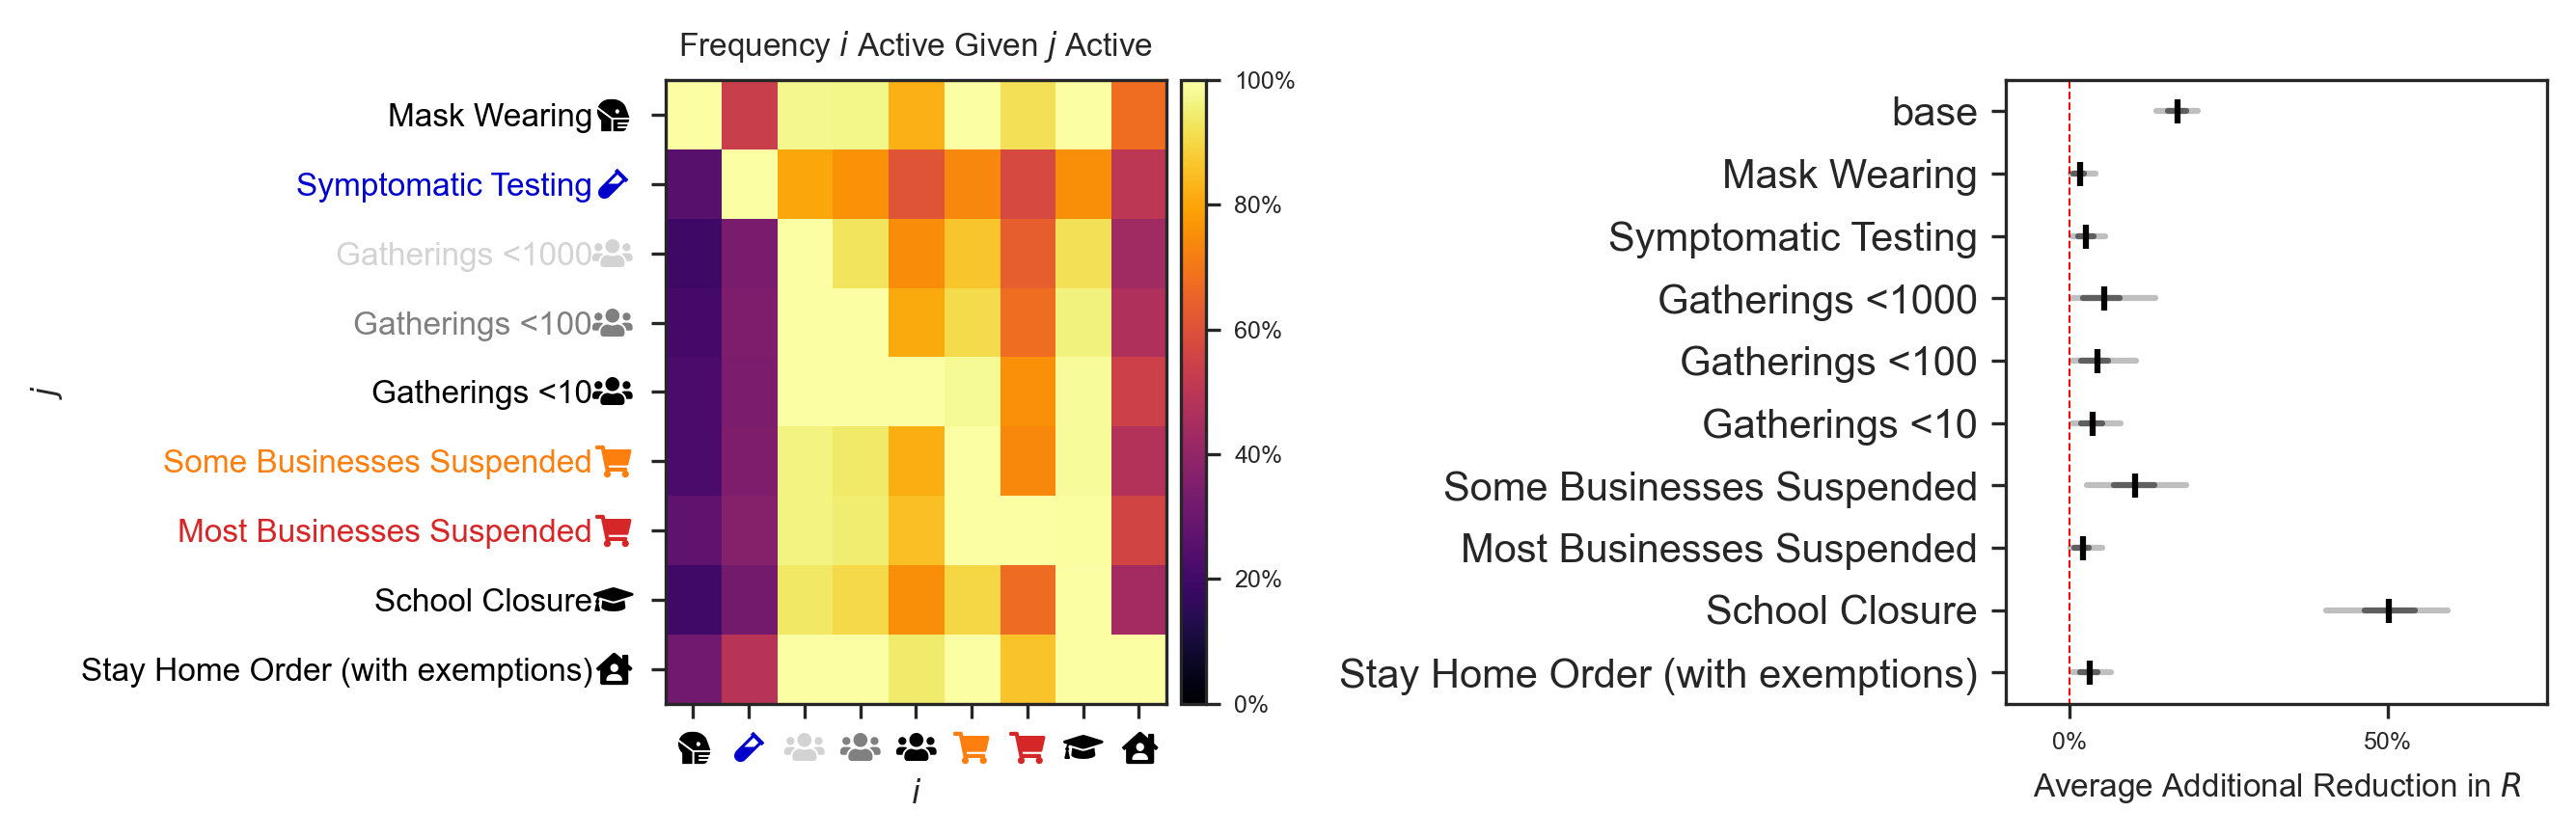

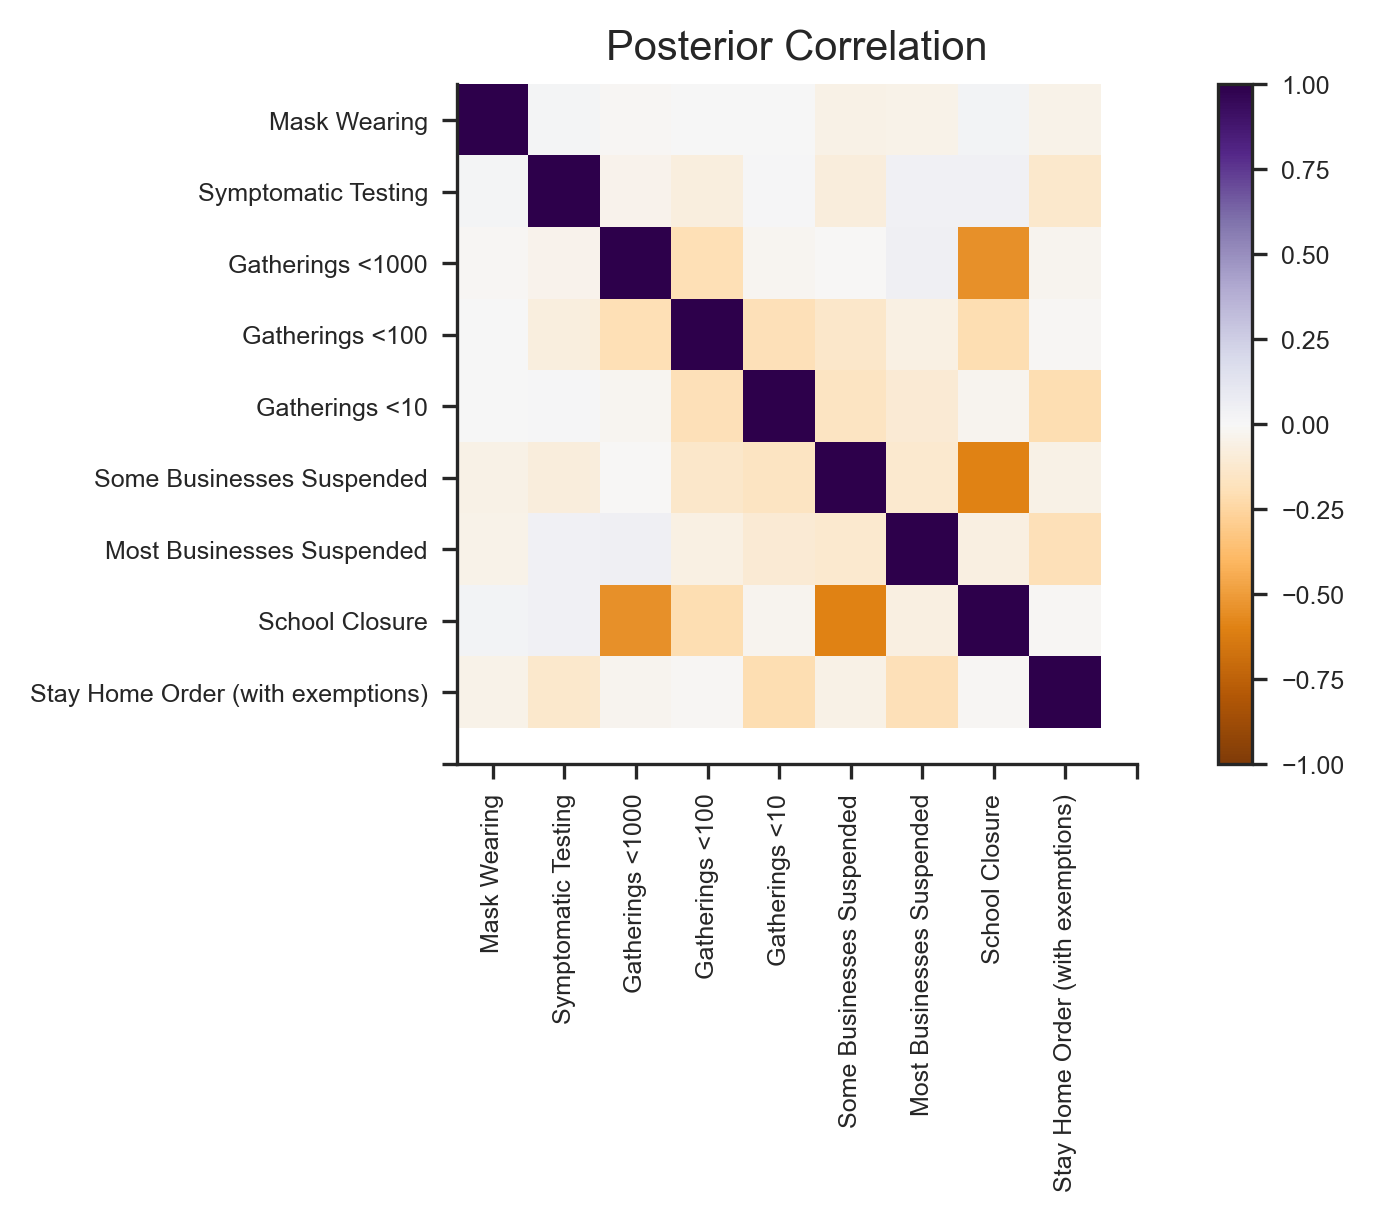

In [26]:
model.plot_effect(x_min = -10, x_max=75)

In [27]:
import pickle

pickle.dump(model.trace, open("exp-03-additive-small.pkl", "wb"))

In [1]:
import pickle

res = pickle.load(open("exp-03-additive-small.pkl", "rb"))

In [34]:
import numpy as np

100*np.mean(100*res["AllBeta"][:, 2] < 1)

19.75

In [26]:
np.mean(100*res["AllBeta"][:, 2])

2.60613829527468

INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/neurips/out at 31-05;10-59
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/neurips/out at 31-05;10-59


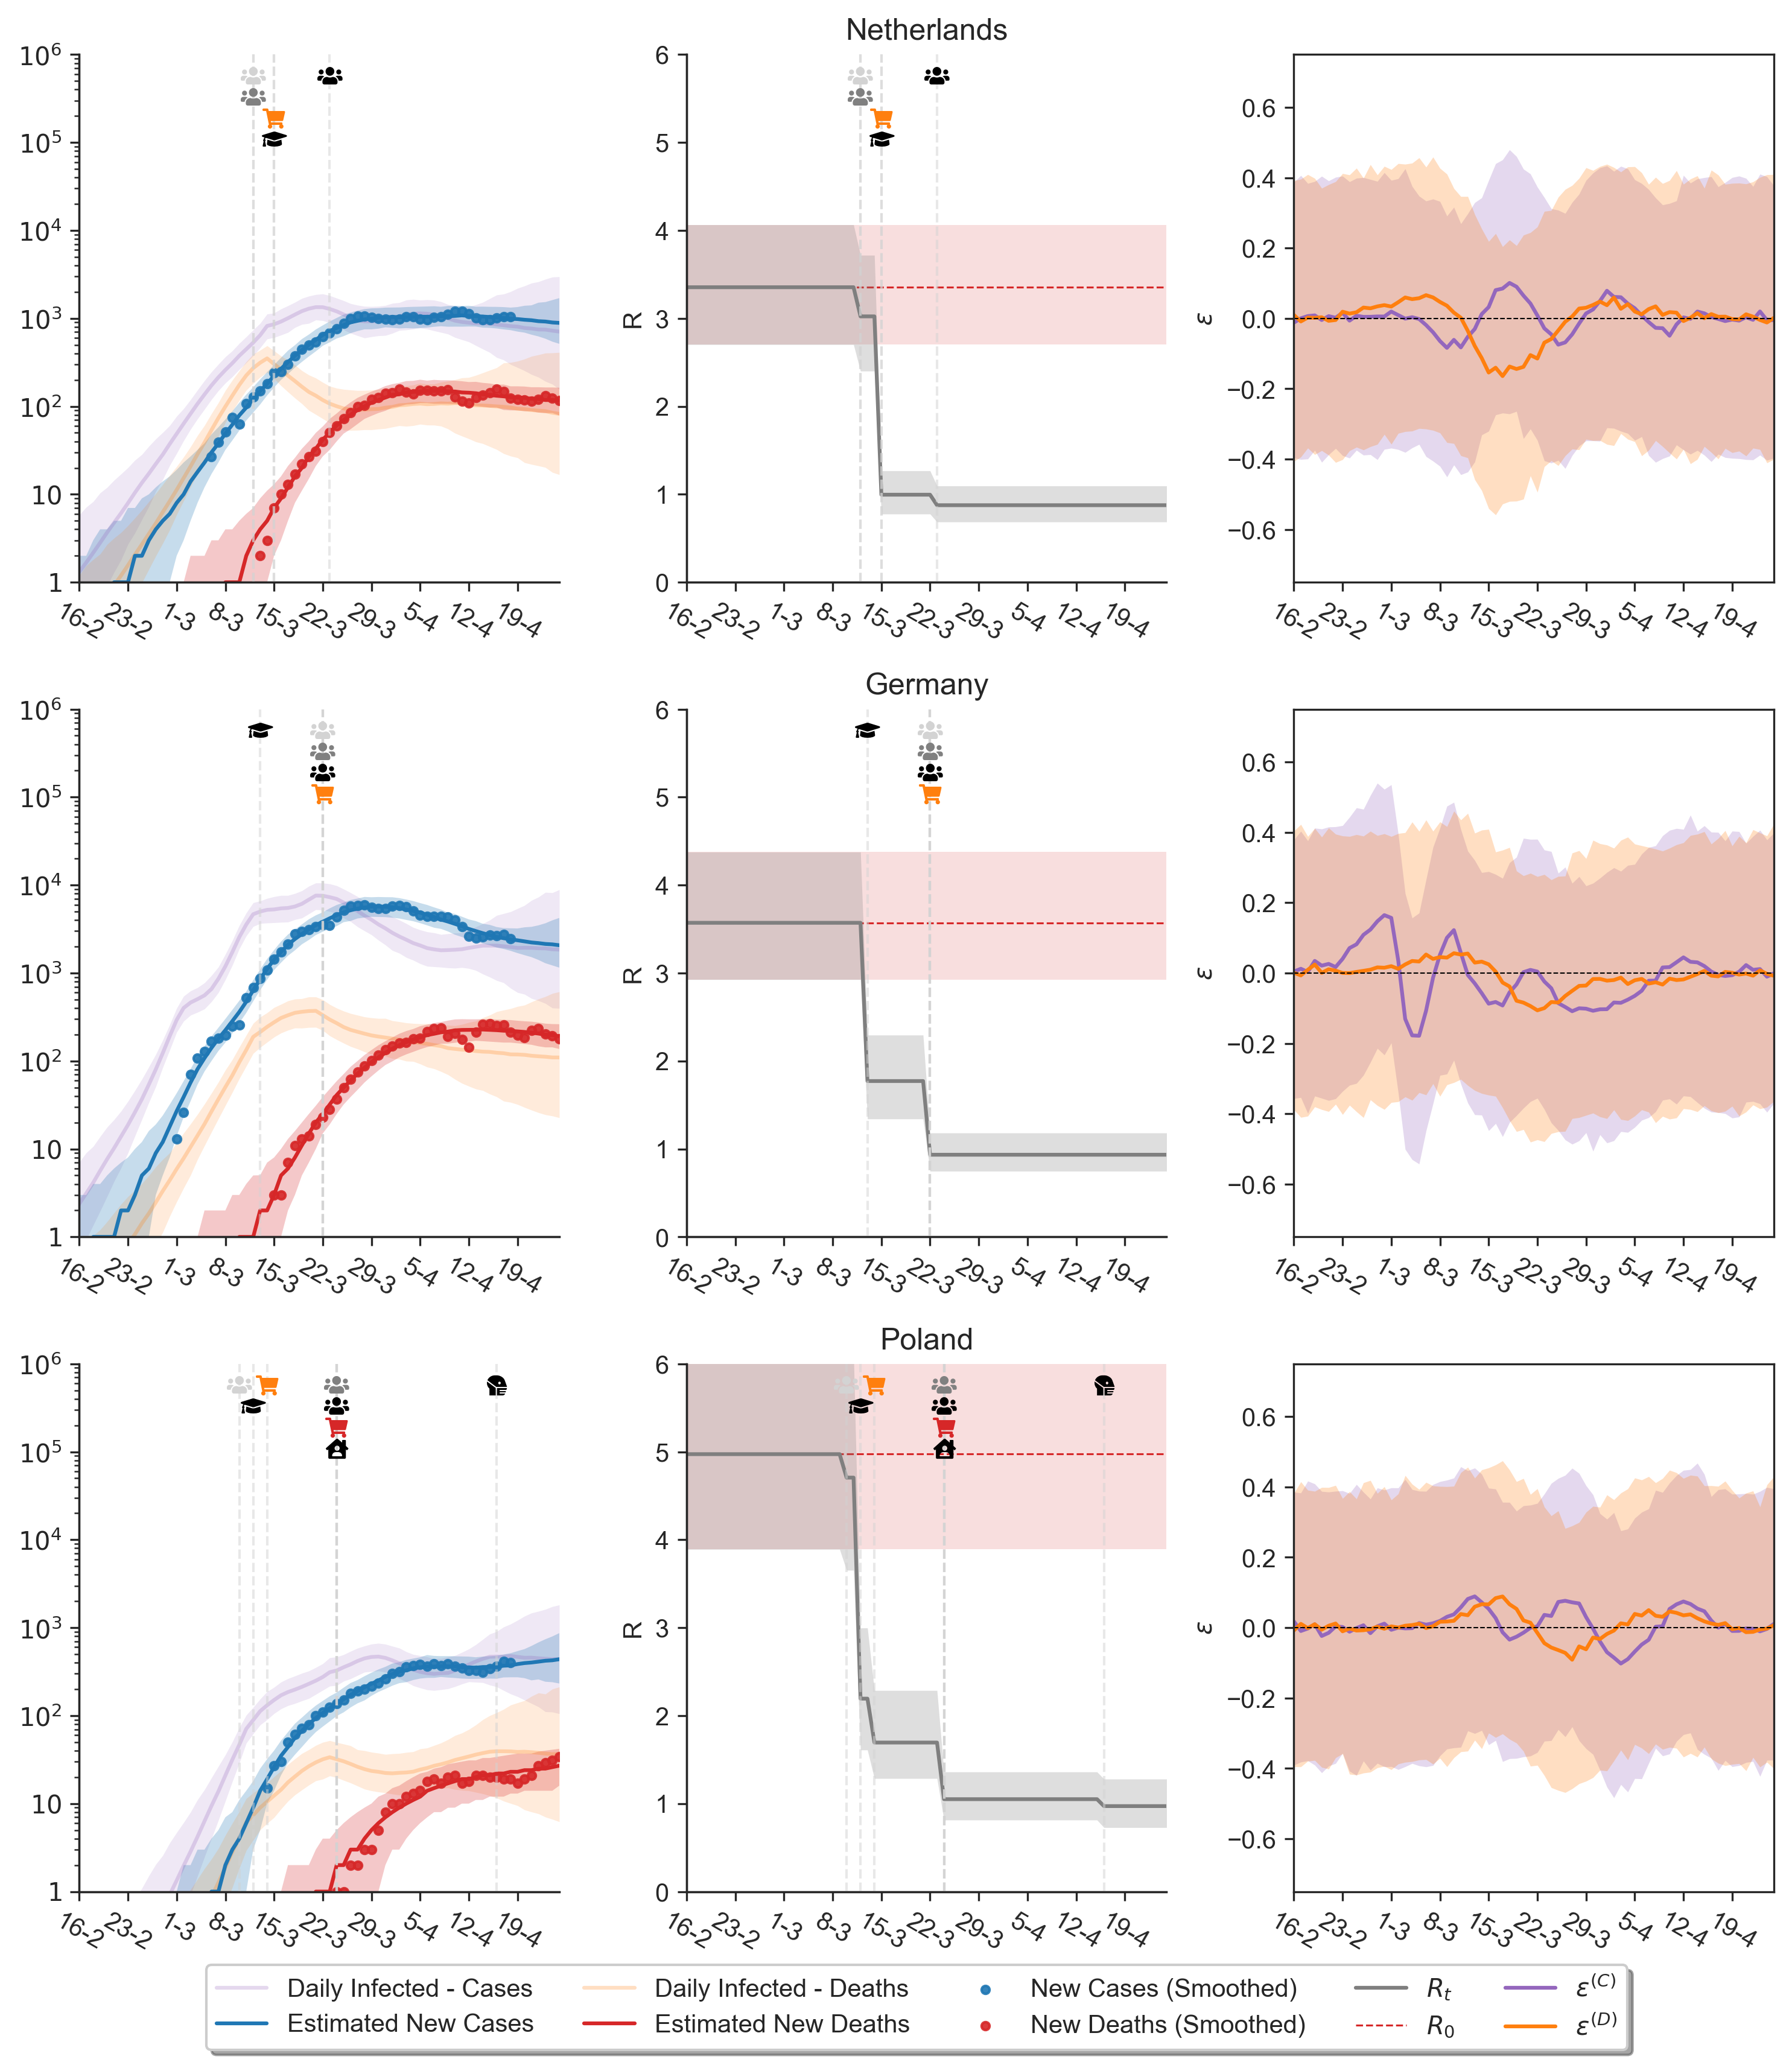

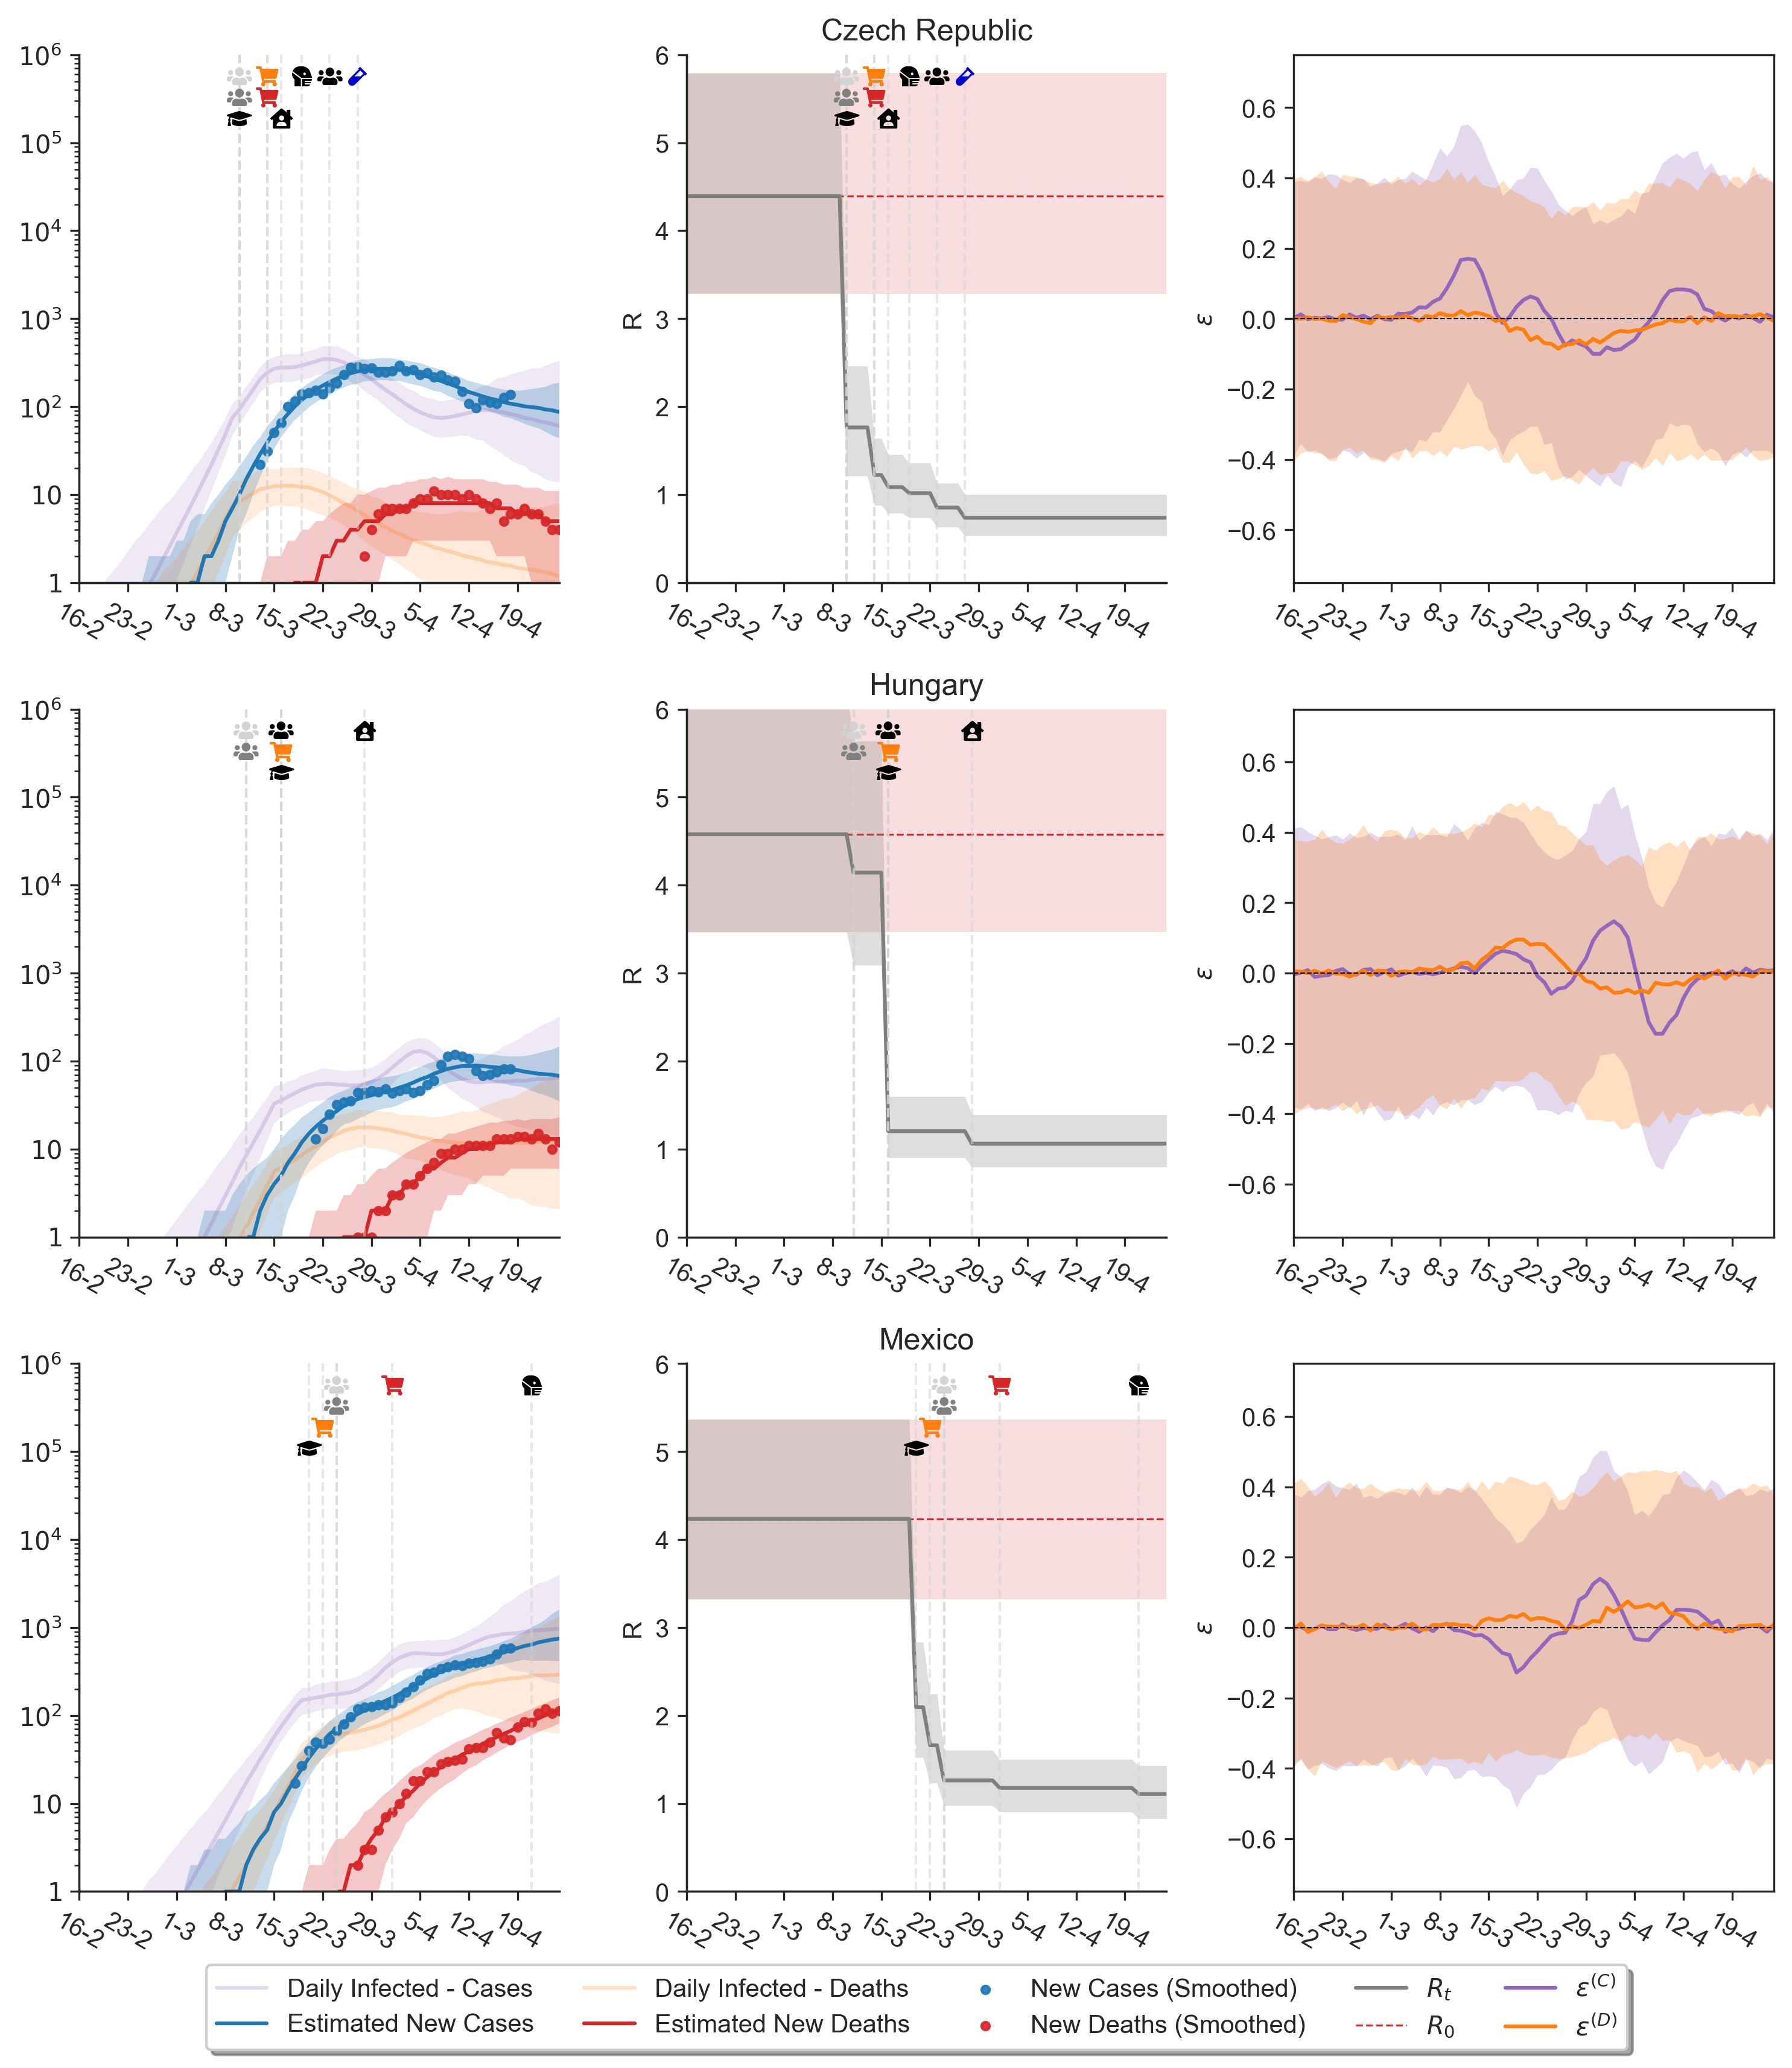

In [28]:
regions = ["NL", "DE", "PL", "CZ", "HU", "MX"]
r_i = [data.Rs.index(r) for r in regions]
model.plot_subset_region_predictions(r_i, model.cm_plot_style)

# Lets look at holdouts

See if $\sigma_N \simeq 0.2$ is appropriate

In [3]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_final.csv")

def mask_region(d, region, days=14):
    i = d.Rs.index(region)
    c_s = np.nonzero(np.cumsum(d.NewCases.data[i, :] > 0)==days+1)[0][0]
    d_s = np.nonzero(np.cumsum(d.NewDeaths.data[i, :] > 0)==days+1)[0][0]
    print(f"Region {region} masking from day {c_s} and {d_s}")
    d.Active.mask[i,c_s:] = True
    d.Confirmed.mask[i,c_s:] = True
    d.Deaths.mask[i,d_s:] = True
    d.NewDeaths.mask[i,d_s:] = True
    d.NewCases.mask[i,c_s:] = True
    
def unmask_all(d):
    d.Active.mask = False
    d.Confirmed.mask = False
    d.Deaths.mask = False
    d.NewDeaths.mask = False
    d.NewCases.mask = False
    
HO_rs = ["DE", "PT", "CZ", "PL", "MX", "NL"]
indxs = [data.Rs.index(rg) for rg in HO_rs]
unmask_all(data)
for region in HO_rs:
    mask_region(data, region)

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


Region DE masking from day 52 and 66
Region PT masking from day 64 and 73
Region CZ masking from day 64 and 79
Region PL masking from day 65 and 75
Region MX masking from day 69 and 78
Region NL masking from day 57 and 65


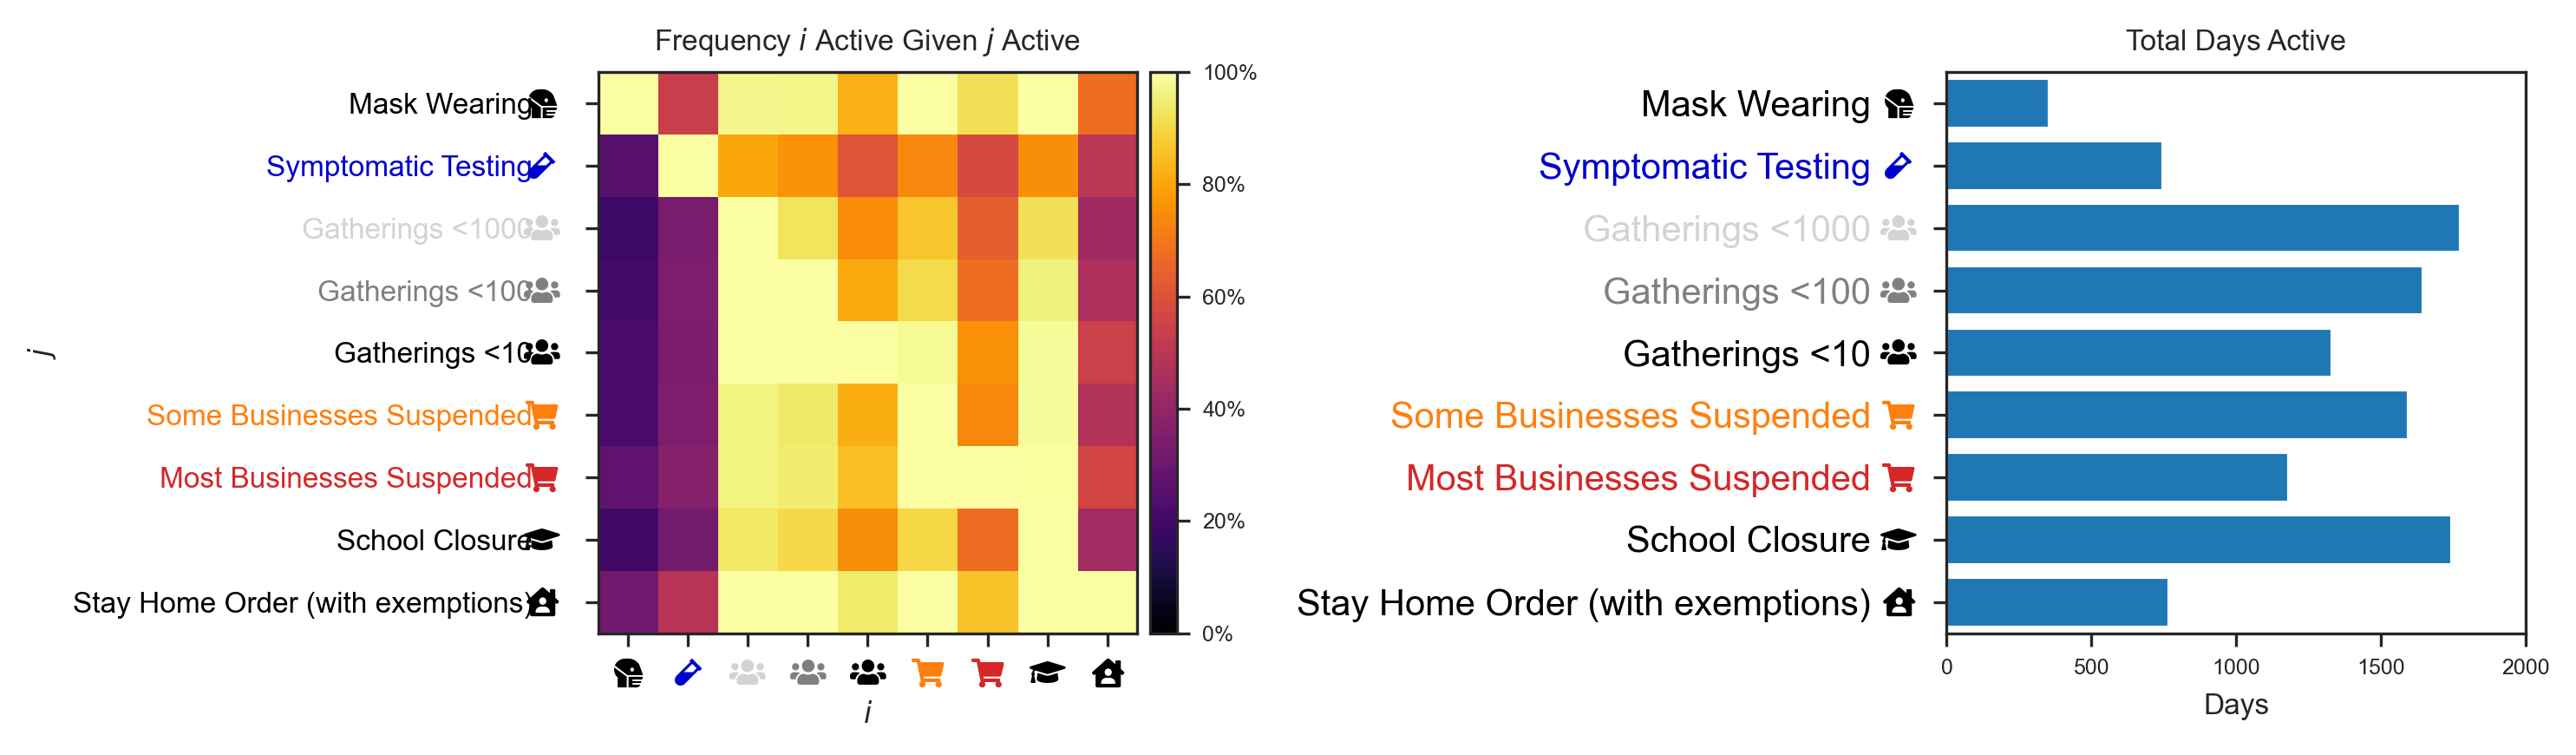

In [5]:
cm_plot_style = [
#             ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf492", "mediumblue"), # vial
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2 
            ("\uf19d", "black"), # school
            ("\uf965", "black") # home
        ]
data.summary_plot(cm_plot_style)

In [6]:
with cm_effect.models.CMCombined_Additive(data, cm_plot_style) as model:
    model.build_model()

with model.model:
    model.trace = pm.sample(500, chains=4, cores=4, target_accept=0.95)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, HyperRVar, HyperRMean, AllBeta]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, HyperRVar, HyperRMean, AllBeta]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [54:52<00:00,  1.21draws/s]  
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
INFO:pymc3:The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is 

NameError: name 'pickle' is not defined

In [7]:
import pickle
pickle.dump(model.trace, open("exp-03-additive-small-ho.pkl", "wb"))

INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/neurips/out at 31-05;13-48
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/neurips/out at 31-05;13-48


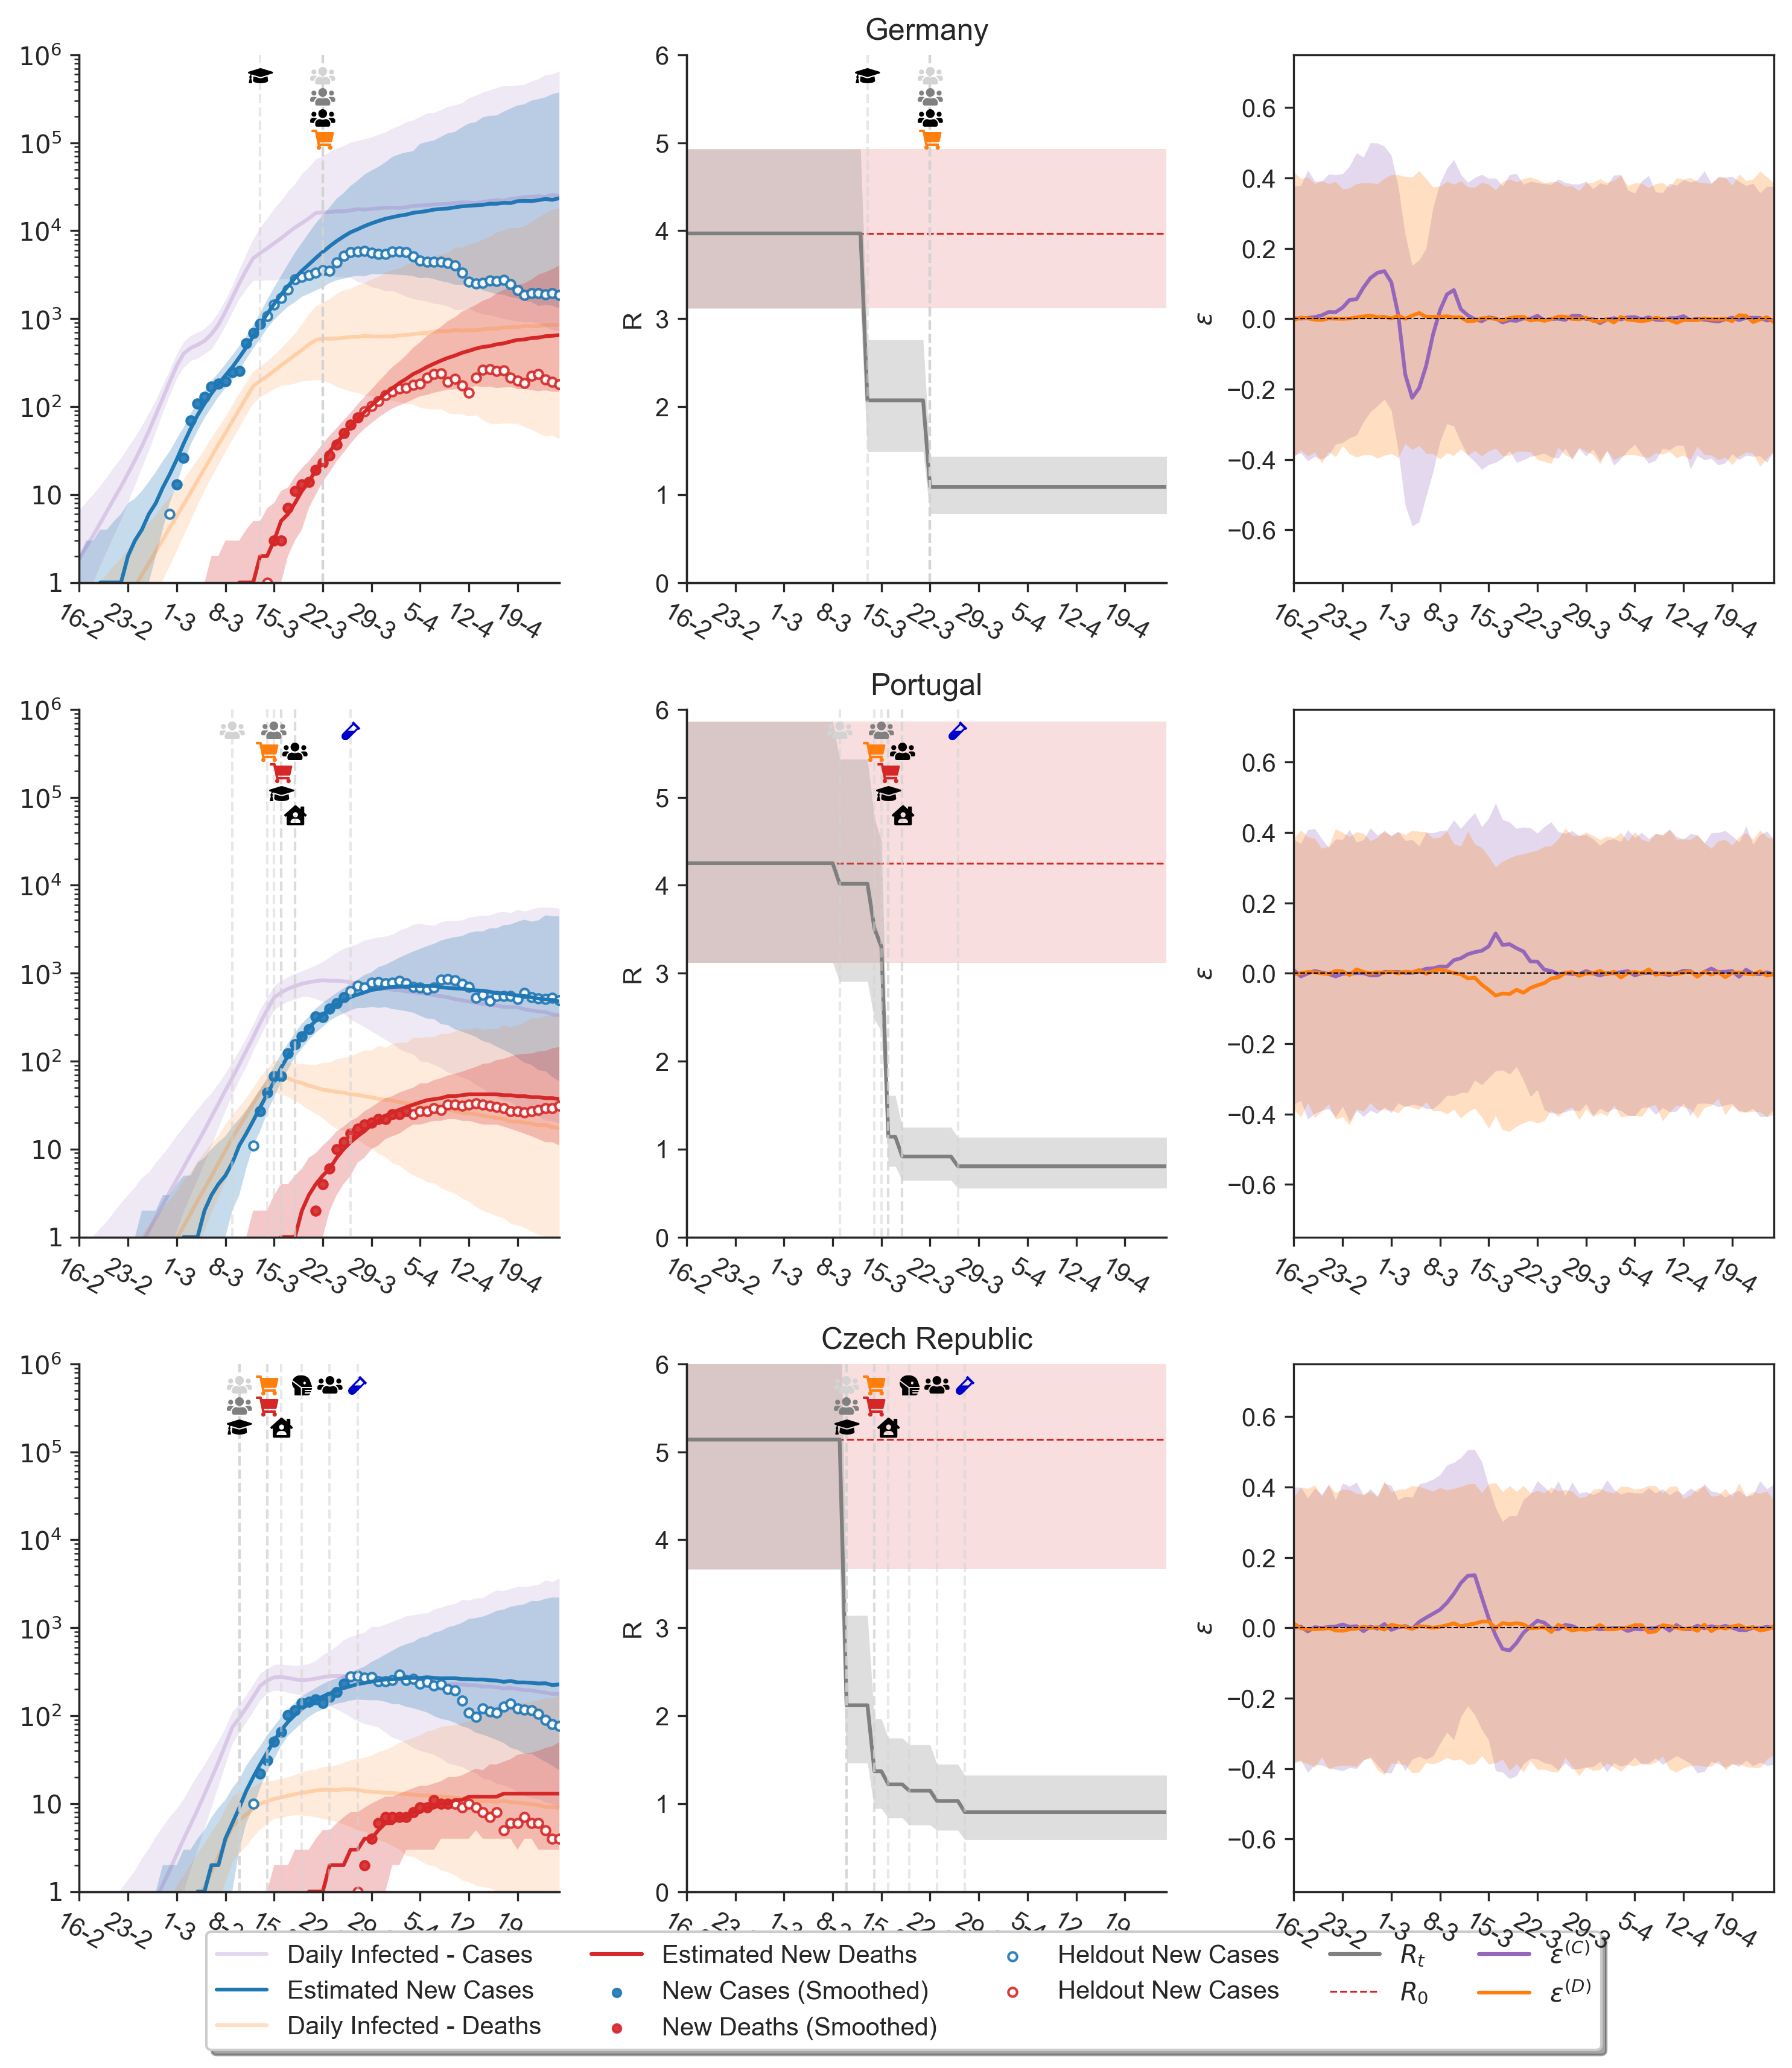

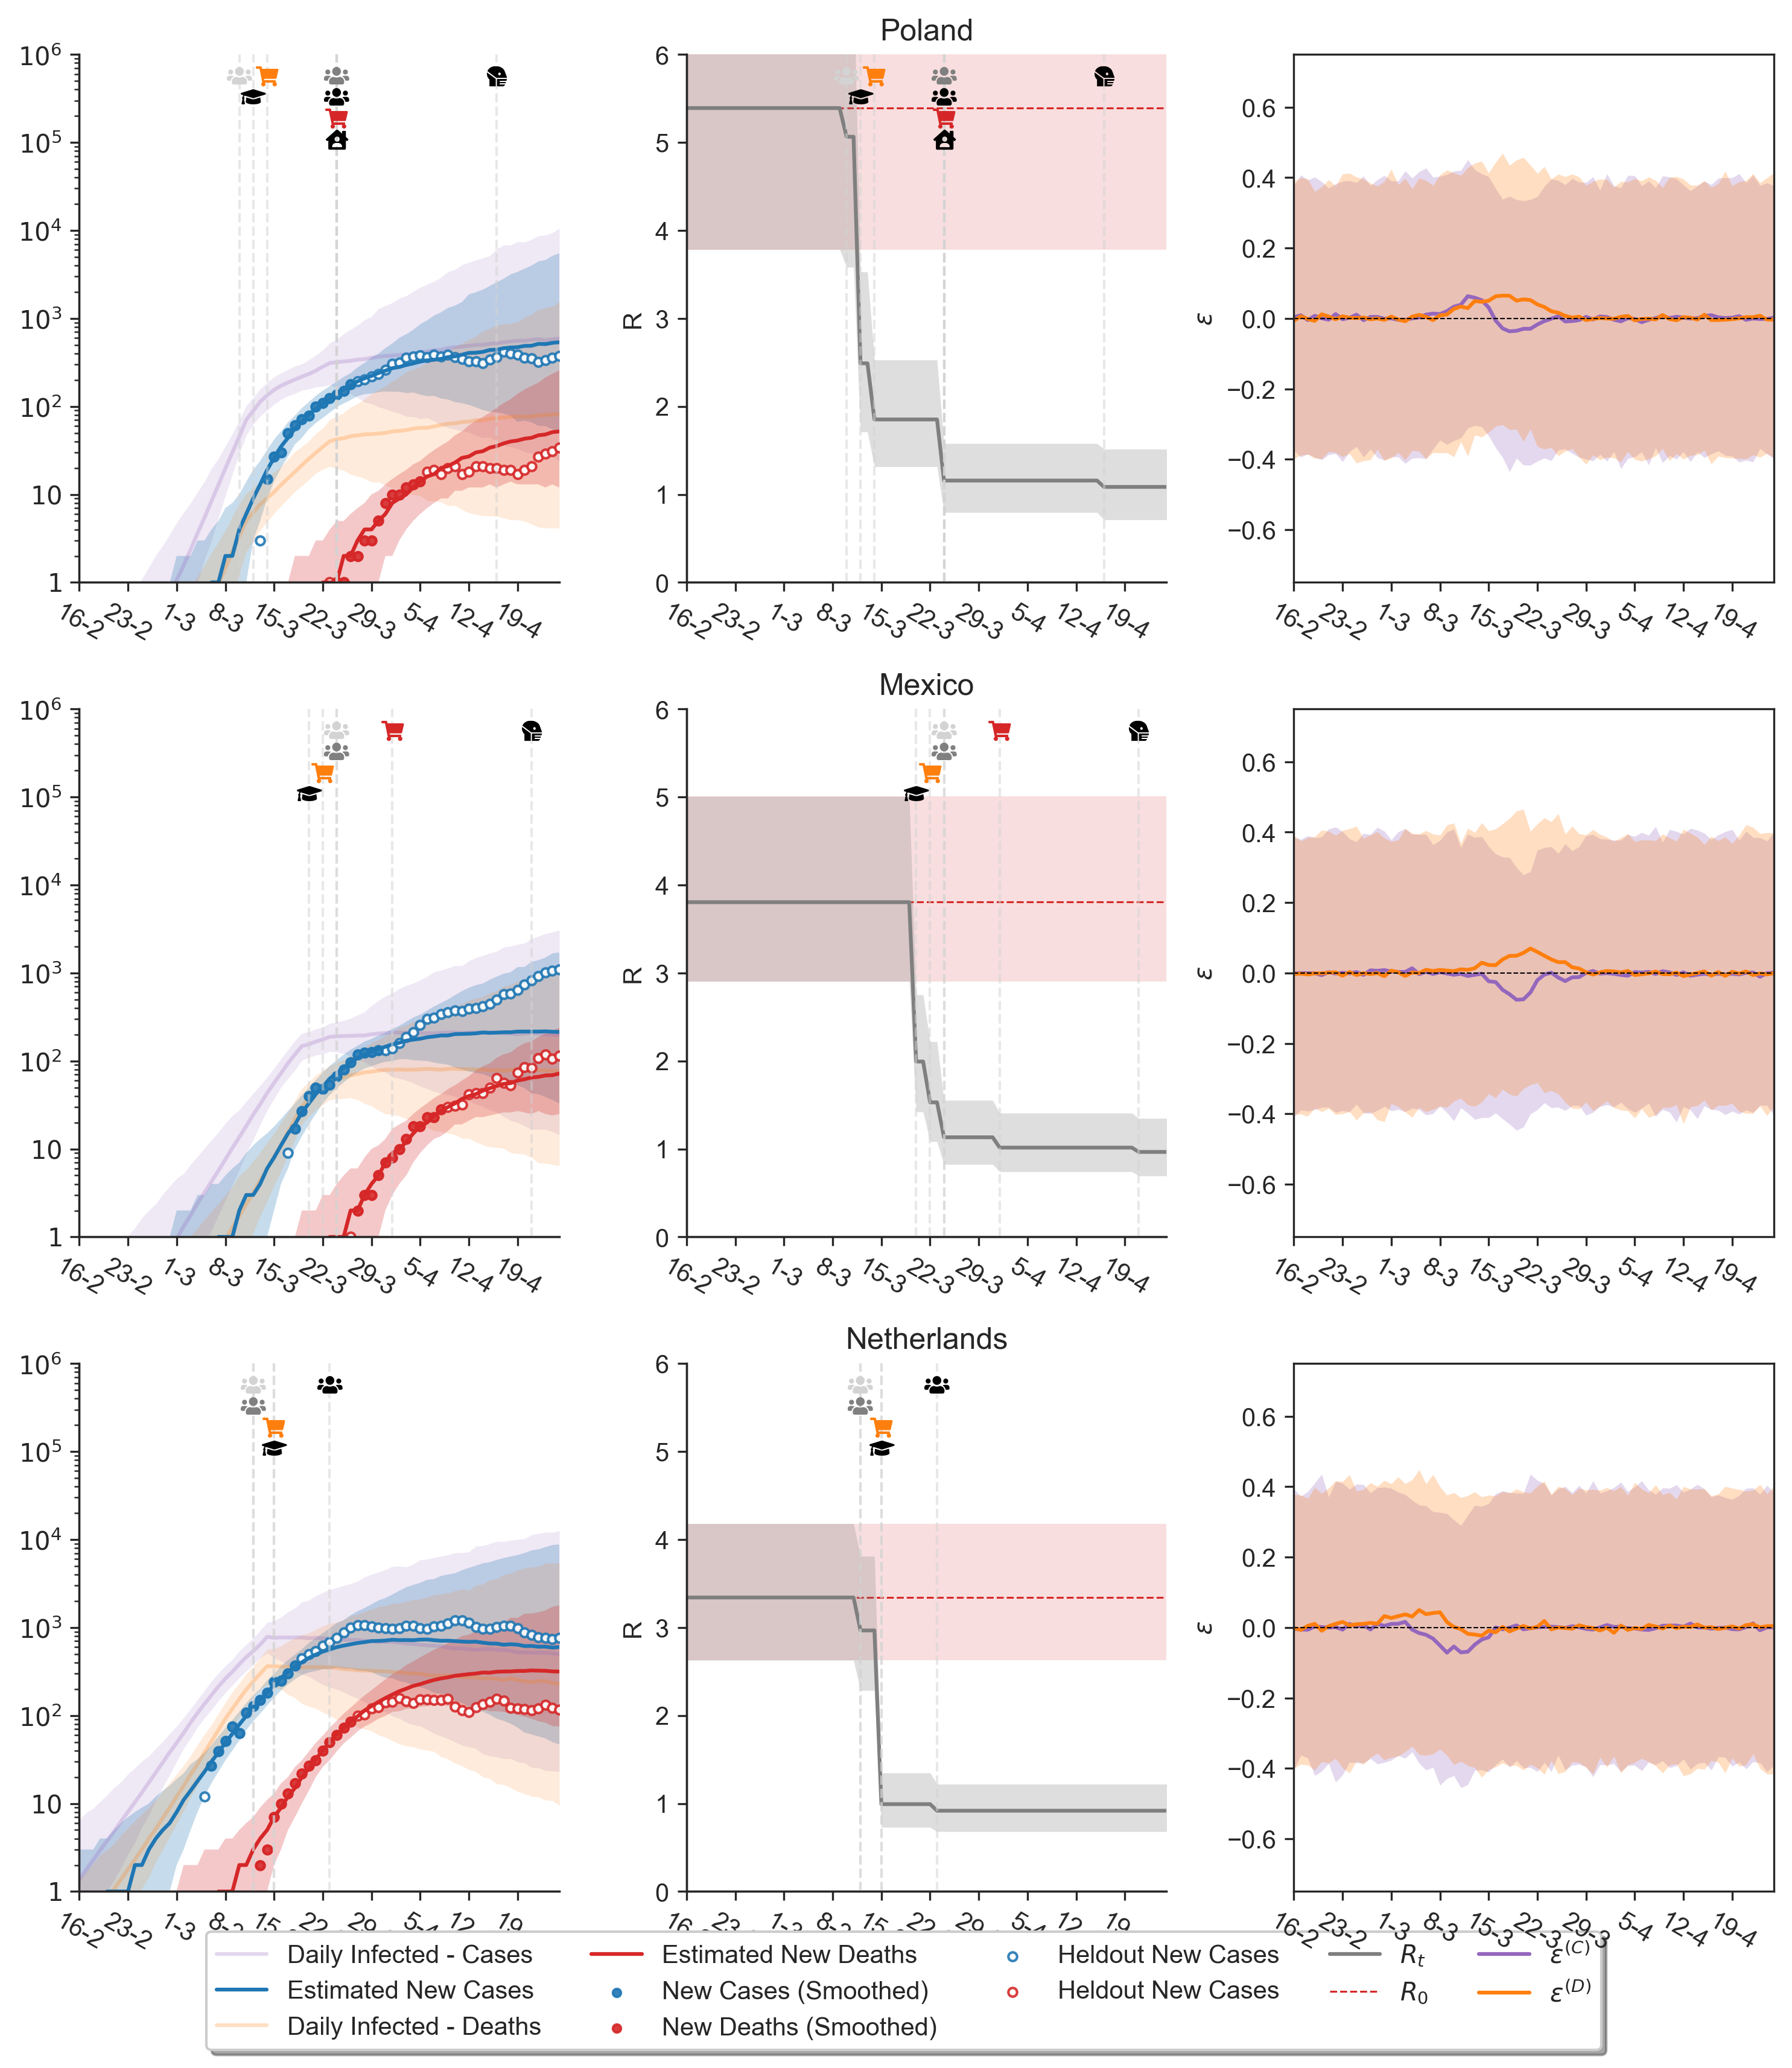

In [11]:
model.plot_subset_region_predictions(indxs, model.cm_plot_style)

# Longer, full model run

[('北', 'black'), ('\uf492', 'mediumblue'), ('\uf0c0', 'lightgrey'), ('\uf0c0', 'grey'), ('\uf0c0', 'black'), ('\uf07a', 'tab:orange'), ('\uf07a', 'tab:red'), ('\uf19d', 'black'), ('便', 'black')]


/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 41 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3

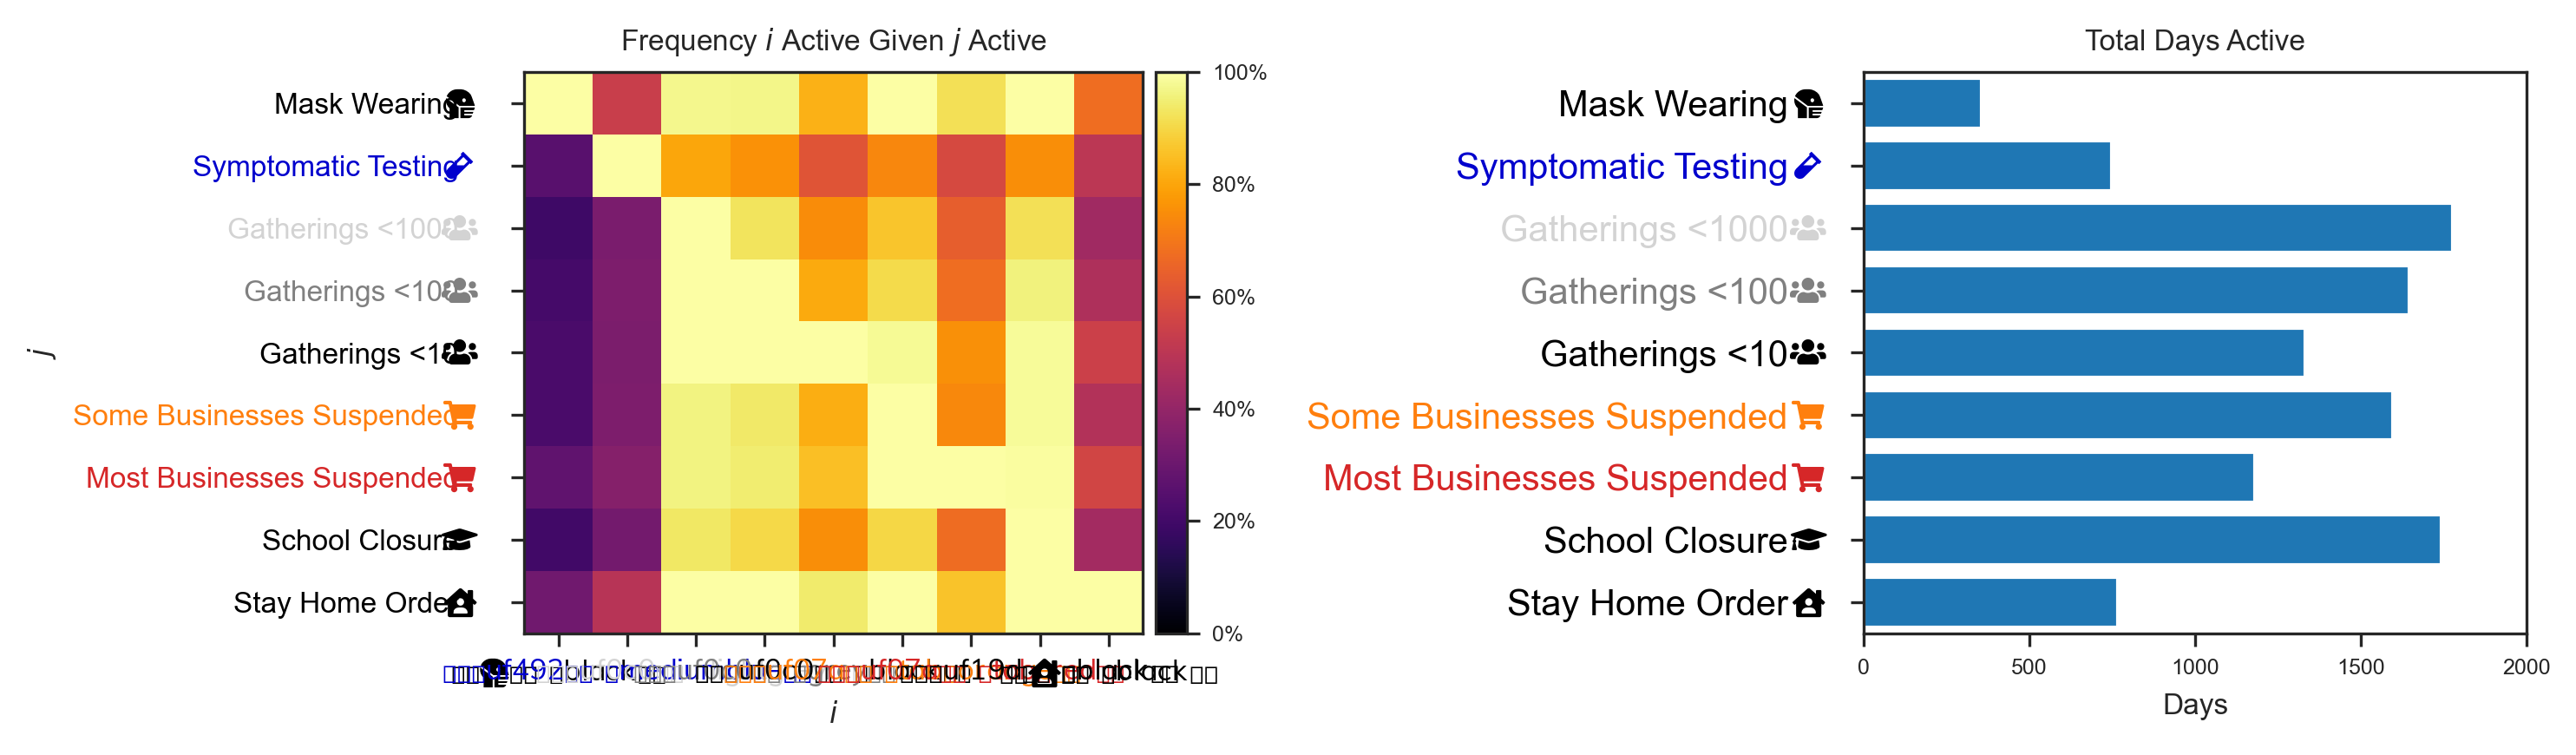

In [7]:
cm_plot_style = [
#             ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf492", "mediumblue"), # vial
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2 
            ("\uf19d", "black"), # school
            ("\uf965", "black") # home
        ]
data.summary_plot(cm_plot_style)

dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_final.csv")

with cm_effect.models.CMCombined_Additive(data, cm_plot_style) as model:
    model.build_model()

In [ ]:
with model.model:
    model.trace = pm.sample(2000, chains=4, cores=4, target_accept=0.9)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, HyperRVar, HyperRMean, AllBeta]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, HyperRVar, HyperRMean, AllBeta]
Sampling 4 chains, 0 divergences:  72%|███████▏  | 7218/10000 [2:37:58<40:08,  1.16draws/s]  

In [6]:
pickle.dump(model.trace, open("exp-03-additive.pkl", "wb"))

NameError: name 'pickle' is not defined